<a href="https://colab.research.google.com/github/ziobroaatwit/ADL22/blob/main/Copy_of_Boston_housing_dense_NN_using_Keras_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting house prices

The idea is borrowed from  Chollet (2017, p.85) [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb)

Solves regression problem using scikit LinReg and a fully connected NN designed with Keras.

See Chollet [Git link](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb) for K-fold validation.

Given datappoints about the housing in Boston in mid 70's, predict sale price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
%tensorflow_version 2.x
# from tensorflow.keras.datasets import boston_housing

In [3]:
#scikit version has descriptions:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
#Format: Dictionary 
# print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [5]:
#info on the data.
#pandas are pretty. 
df = pd.DataFrame(boston.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Normalize data

0 mean and unit variance

Note: we should technically use only the train data here. 

In [6]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

#Similar to StandardScaler():
X -= X.mean(0) #axis=0 so it operates across each column/feature
X /= X.std(0)

df = pd.DataFrame(X)
df.describe()


(506, 13) (506,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-5.285627e-16,-2.354671e-15,5.092545e-16,2.544736e-15,-1.146031e-14,-1.122510e-15,9.834031e-16,1.553873e-15,-8.012914e-16,-1.020966e-14,8.075008e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.8)

print(Xtrain.shape, ytrain.shape)

(404, 13) (404,)


In [8]:
print("Attributes:\n", Xtrain[:3], "\n Prices:\n", ytrain[:3])

Attributes:
 [[ 1.32780421 -0.48772236  1.01599907 -0.27259857  0.51229565 -1.39706929
   1.02148094 -0.80543822  1.66124525  1.53092646  0.80657583 -0.07887794
   1.7181012 ]
 [-0.34750602 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.64200019
  -0.42939039  0.33444943 -0.6379618  -0.6012761   1.17646583  0.42701755
  -0.5863558 ]
 [-0.41648392  1.01446252 -0.74074945 -0.27259857 -1.00891427 -0.36134243
  -1.61000138  1.35273767 -0.98284286 -0.61909395 -0.71922039  0.06113692
  -0.67606702]] 
 Prices:
 [12.  19.9 19.4]


## Linear Regression

[Diabetes dataset Linear Regression Model example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [9]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#SciKit Lin Reg using the train/test split:
#1. Create a model
#2. Train
#3. Predict

#ME
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


MSE Linear Regression: 24.29


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

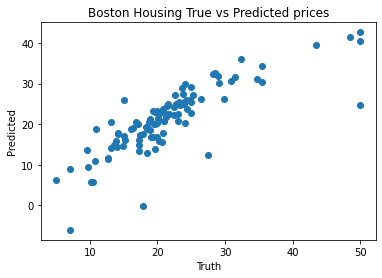

In [10]:
#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

### Solution

What did the model learn?

In [11]:
# Model weights:
print("Model intercept:", model.intercept_)
print("Model slopes:    ", model.coef_)

Model intercept: 22.485268239316913
Model slopes:     [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]


### Bonus

Add poly features via a pipeline

What is a good degree for this model?

[make_pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#ME
model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))


MSE Linear Regression: 14.25


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

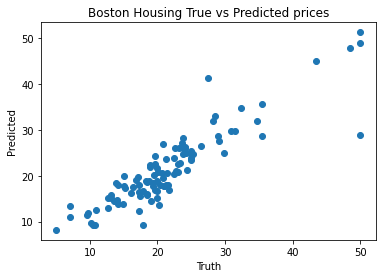

In [13]:
#train and evaluate 

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)
#how much does poly and scaling help?

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

## Dense NN using Keras

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
# define model

#Dense is a fully-connected NN: activation(dot(input, kernel) + bias)

def ex_model():
	# Add layers in given order
  model = Sequential() 
  #Seq: indicates we want to define the NN layer by layer;
  #each layer stacks on top of the next. 
  #comes with fit,eval,predict. (and corresponding generators)
  
  model.add(Dense(13, input_shape=(Xtrain.shape[1],), activation='relu'))
  #we only need input size for the first layer. After that, it will auto-fill.

  model.add(Dense(1))
  #no actications for the output layer. used for predicting a continous value.
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model


Epoch 1/10
404/404 [==============================] - 3s 5ms/step - loss: 583.8937 - mae: 22.0396
Epoch 2/10
404/404 [==============================] - 2s 5ms/step - loss: 465.1630 - mae: 18.6369
Epoch 3/10
404/404 [==============================] - 2s 6ms/step - loss: 288.1515 - mae: 14.1438
Epoch 4/10
404/404 [==============================] - 2s 4ms/step - loss: 109.9662 - mae: 8.2013
Epoch 5/10
404/404 [==============================] - 2s 5ms/step - loss: 41.5745 - mae: 4.5711
Epoch 6/10
404/404 [==============================] - 2s 4ms/step - loss: 31.9322 - mae: 4.0960
Epoch 7/10
404/404 [==============================] - 2s 4ms/step - loss: 29.0738 - mae: 3.9654
Epoch 8/10
404/404 [==============================] - 1s 4ms/step - loss: 27.3019 - mae: 3.8529
Epoch 9/10
404/404 [==============================] - 2s 4ms/step - loss: 25.9484 - mae: 3.7901
Epoch 10/10
404/404 [==============================] - 2s 6ms/step - loss: 24.8572 - mae: 3.7294
MSE Keras example: 26.26


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

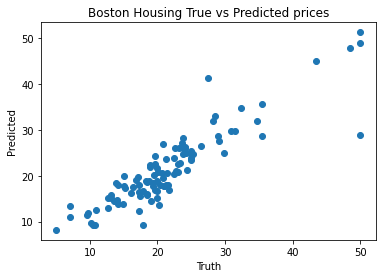

In [16]:
model = ex_model()
ne = 10 #number of train loops
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE Keras example: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [17]:
#alternative approach with cross-validation
#model object
# estimator = KerasRegressor(build_fn=ex_model, epochs=100, batch_size=5, verbose=1)
# 
# cvf = KFold(n_splits=2)
# results = cross_val_score(estimator, X, y, cv=cvf)
# print("Results: %.2f (+/-%.2f) MSE" % (results.mean(), results.std()))

# Results: -88.81 (46.90) MSE

## Exercise

Tune your own neural network to beat linear regression:

`MSE Linear Regression: 24.29`

What should I change? 
- train time: What is a good *ne* (number of train loops/epochs)? 
- Make the network deeper/wider
  - tune # of layers/neurons in the model. 

### Larger model example

#### How to create a deeper model?
Add another layer to your model to make it more flexible <br>

#### How to create wider models?
increase 13 to 30.



**Con:** The larger the model, the more coeff you have to train. This requires:
- more data 
- more training time
If you don't have enough data, your model will *overfit* and won't be able to generalize.


Epoch 1/10
404/404 [==============================] - 4s 5ms/step - loss: 69.1106 - mae: 5.6089
Epoch 2/10
404/404 [==============================] - 1s 3ms/step - loss: 24.4088 - mae: 3.5616
Epoch 3/10
404/404 [==============================] - 1s 3ms/step - loss: 22.5377 - mae: 3.5907
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 18.6390 - mae: 3.2805
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 19.7378 - mae: 3.1560
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 12.0866 - mae: 2.6499
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 11.4887 - mae: 2.4992
Epoch 8/10
404/404 [==============================] - 1s 2ms/step - loss: 17.8829 - mae: 3.0131
Epoch 9/10
404/404 [==============================] - 1s 2ms/step - loss: 10.3482 - mae: 2.4482
Epoch 10/10
404/404 [==============================] - 1s 2ms/step - loss: 8.8395 - mae: 2.2479
Test: MSE my network: 13.17
Test: MAE my

Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

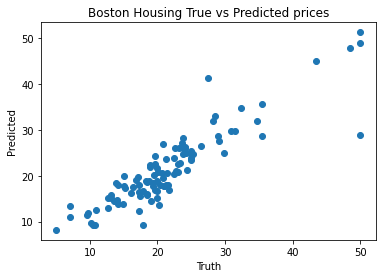

In [18]:

def my_model():
	# Add layers in given order
  model = Sequential()
  model.add(Dense(128, input_shape=(Xtrain.shape[1],), activation='relu'))

  #hidden
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  #model.add(Dense(128, activation='relu'))



  model.add(Dense(1))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model

ne = 30 #number of train loops

#Train
model = my_model()
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
from sklearn.metrics import mean_absolute_error
#Test
#see performance on test data using trained model
y_nn = model.predict(Xtest)
#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
mae = mean_absolute_error(ytest, y_nn)
print("Test: MSE my network: %.2f" % mse)
print("Test: MAE my network: %.2f" % mae)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

### What did we learn?

In [19]:
weights, bias = model.layers[1].get_weights()

print('Weights size: \n', weights.shape)
      
print('Weights: \n', weights,'\n Bias: \n' ,bias)

Weights size: 
 (128, 128)
Weights: 
 [[-0.06575779 -0.06568509  0.13930605 ... -0.1139904  -0.10184991
  -0.15832119]
 [ 0.15069629 -0.1504402   0.12851542 ...  0.12031887  0.08039038
  -0.10325678]
 [ 0.0415563   0.08526886 -0.11202068 ... -0.13784604 -0.09631164
   0.01639262]
 ...
 [-0.10138599  0.04960106  0.06909559 ... -0.07726973  0.08364981
   0.1312828 ]
 [ 0.09109762  0.06868283  0.09764009 ... -0.06853047 -0.09129561
  -0.06450581]
 [ 0.0864422  -0.02194729  0.04468959 ...  0.16926472  0.0117141
   0.05762203]] 
 Bias: 
 [ 0.0880126  -0.06362821 -0.05527529  0.07164807  0.0744288  -0.02914293
 -0.05775908  0.03384392 -0.02214691  0.02948981 -0.02793006 -0.02299729
 -0.01903811  0.03378664  0.06316585 -0.01236691 -0.01594118 -0.01014357
 -0.00687169  0.0985156  -0.00414227  0.06640524 -0.02144485  0.05575802
 -0.0379825   0.02195502  0.07000182 -0.04294393 -0.02887659 -0.01911088
 -0.04012004 -0.01988291  0.00496027 -0.0437237  -0.04003064  0.08512603
  0.02953183  0.0810096